In [0]:
#!pip install datadotworld
#!pip install datadotworld[pandas]

In [0]:
#!dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import datadotworld as dw


In [0]:
#drive.mount("/content/drive")

In [51]:
cd "drive/My Drive/Colab Notebooks/MatrixProject"

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/MatrixProject'
/content/drive/My Drive/Colab Notebooks/MatrixProject


In [52]:
ls

data/  Day3.ipynb  HelloGitHub.ipynb  LICENSE  README.md


In [53]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [0]:
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [57]:
df = data.dataframes['7004_1']
df.shape

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


(19387, 48)

In [58]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
18340,AVpfvzZI1cnluZ0-qiQQ,NaN,Keuka SureGrip,"Home Improvement,Men's Work & Safety Shoes,Wor...",Black,NaN,2017-01-12T06:18:35Z,2017-01-12T06:18:35Z,"[{""dateSeen"":[""2017-01-12T06:18:35Z""],""sourceU...",NaN,8.455650e+11,"[{""key"":""Occasion"",""value"":[""Non-Slip""]},{""key...",NaN,https://i5.walmartimages.com/asr/5922c3ac-d50e...,NaN,"845565047752,0845565047752,keukasuregrip/54224...",Keuka SureGrip,54224-MW-080,"[{""dateSeen"":[""2017-01-12T06:18:35Z""],""name"":""...",Keuka Suregrip Mens Stratton Black Slip Resist...,89.00,89.00,NaN,NaN,new,NaN,USD,2017-01-12T06:18:35Z,2017-01-11T00:00:00Z,NaN,false,SureGrip Footwear - Walmart.com,REDUCED USD 5.00,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Keuka-SureGrip-Mens...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Keuka-SureGrip-Mens...,845565047752,NaN,NaN,NaN
4667,AVpe5JKl1cnluZ0-ZMY7,NaN,Fila,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NavyWhiteGold,NaN,2016-11-15T13:14:41Z,2016-11-15T13:14:41Z,"[{""dateSeen"":[""2016-11-15T13:14:41Z""],""sourceU...",NaN,7.894822e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/cf14adbe-dba8...,NaN,"789482167745,0789482167745",Fila,NaN,"[{""dateSeen"":[""2016-11-15T13:14:41Z""],""name"":""...",Fila Men's Original Tennis Navy/white/gold Fas...,64.95,64.95,NaN,NaN,new,NaN,USD,2016-11-15T13:14:41Z,2016-10-05T00:00:00Z,NaN,false,ULTIMATE SHOE ZONE - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Fila-Men-s-Original...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Fila-Men-s-Original...,789482167745,NaN,NaN,NaN
2840,AVpfCg6xLJeJML431DHM,NaN,Dickies,"All Men's Clothing,Men's Clothing,Clothing, Sh...",NaN,NaN,2016-01-01T02:22:13Z,2016-03-30T21:52:31Z,NaN,1 in x 5 in x 11 in,NaN,NaN,NaN,http://c.shld.net/rpx/i/s/pi/mp/1363/prod_3009...,NaN,"dickies/du260rtb3630,dickiesdu260rtb3630mensre...",NaN,DU260RTB3630,NaN,Dickies Du260rtb 36 30 Mens Relaxed Straight F...,44.28,44.28,NaN,NaN,NaN,NaN,USD,2016-01-01T02:22:13Z,2016-01-01T00:00:00Z,NaN,false,"UnbeatableSale.com, Inc.",NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN
9878,AVpfRhoiLJeJML436DdL,NaN,Masimo New York,"Men's Dress Shoes,Shoes,Men's Shoes,Clothing",Red,NaN,2017-01-12T06:16:17Z,2017-01-12T06:16:17Z,"[{""dateSeen"":[""2017-01-12T06:16:17Z""],""sourceU...",NaN,4.080006e+11,"[{""key"":""Material"",""value"":[""Leather""]},{""key""...",NaN,https://i5.walmartimages.com/asr/3ea950e1-7fed...,NaN,"0408000641801,408000641801,masimonewyork/37048...",Masimo New York,370480-RED,"[{""dateSeen"":[""2017-01-12T06:16:17Z""],""name"":""...",Masimo New York Austin Round Toe Leather Lo...,40.00,40.00,NaN,NaN,new,NaN,USD,2017-01-12T06:16:17Z,2017-01-11T00:00:00Z,NaN,false,ApparelSave - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Masimo-New-York-Aus...,NaN,NaN,NaN,"10,7,11,12",NaN,https://www.walmart.com/ip/Masimo-New-York-Aus...,408000641801,NaN,NaN,NaN
5042,AVpfLjMX1cnluZ0-fn-J,NaN,Keen,"All Men's Shoes,Shoes,Men's Shoes,Clothing",Brown,NaN,2017-01-07T19:42:21Z,2017-01-07T19:42:21Z,"[{""dateSeen"":[""2017-01-07T19:42:21Z""],""sourceU...",NaN,8.712098e+11,"[{""key"":""Material"",""value"":[""Leather""]},{""key""...",NaN,https://i5.walmartimages.com/asr/44a58093-219e...,NaN,"871209793983,0871209793983,keen/1002577",Keen,1002577,"[{""dateSeen

In [59]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [60]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [61]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
New with box                                              3
UnbeatableSale.com, Inc. - Walmart.com                    3
new                                                       3
PalmBeach Jewelry - Walmart.com                           3
Wholesale Costume and Party Supplies - Walmart.com        2
SHOEBACCA LTD. - Walmart.com                              1
Shoes.com                                                 1
New without tags                                          1
Name: prices_currency, dtype: int64

In [0]:
df_usd = df[df.prices_currency =='USD'].copy()

In [0]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)

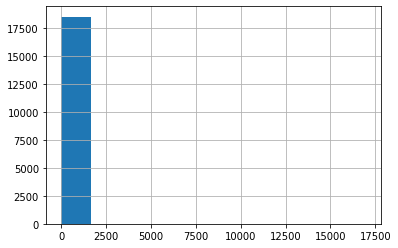

In [64]:
df_usd['prices_amountmin'].hist()

In [65]:
filter_max = np.percentile(df_usd['prices_amountmin'], 99)
filter_max

895.0

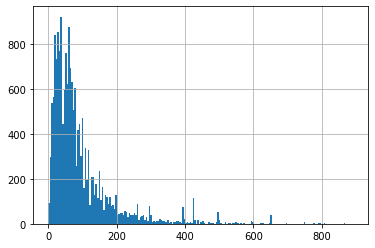

In [66]:
df_usd_filter = df_usd [ df_usd['prices_amountmin'] < filter_max ]
df_usd_filter.prices_amountmin.hist(bins = 200)

In [0]:
df.to_csv('data/shoes_prices.csv', index = False)

In [68]:
ls 

data/  Day3.ipynb  HelloGitHub.ipynb  LICENSE  README.md


In [0]:
!git add Day3.ipynb

In [70]:
!git commit -m "Add men's shoe prices dataset from data.world"

[master 9fe2e8e] Add men's shoe prices dataset from data.world
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Day3.ipynb (98%)


In [71]:
!git push -u origin master

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.27 KiB | 217.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/JakGor/MatrixProject.git
   d606e9d..9fe2e8e  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
